In [ ]:
try:
   %tensorflow_version only exists in Colab.
   %tensorflow_version 2.x
except Exception:
  pass


Unknown TensorFlow version: only exists in Colab.
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import IPython.display as display
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import preprocess_input
import time
import seaborn as sns
import numpy as np
import cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import Session
config = ConfigProto()
# dynamically grow the memory used on the GPU
config.gpu_options.allow_growth = True  
sess = Session(config=config)
tf.keras.backend.clear_session()
#2labels
#json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/nofix=fix/mobinenet_T=T/04032020_196.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#model = tf.keras.models.model_from_json(loaded_model_json)
#model.load_weights('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/nofix=fix/mobinenet_T=T/04032020_196.h5')

#9labels
#json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/mobinenet_T=T/06032020.json', 'r')
json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/Dense/dense.json', 'r')
#json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/VGG/06032020.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
model = tf.keras.models.model_from_json(loaded_model_json)
#model.load_weights('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/mobinenet_T=T/06032020.h5')
#json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/mobinenet_T=T/06032020.h5', 'r')
model.load_weights('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/Dense/dense.h5')
json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/Dense/dense.h5', 'r')
#model.load_weights('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/VGG/06032020.h5')
#json_file = open('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/model/allclass/VGG/06032020.h5', 'r')

In [ ]:
img = cv2.imread(r'/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case20.jpg',0)

In [ ]:
from scipy import ndimage
img = cv2.imread(r'/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case20.jpg',0)
# edges = cv2.Canny(img,60,40)
#imagem = 255-img
def processing(img):
  import math
  L = 256;
  #c = 1;
  c = (L - 1)/math.log(L) 
  image = np.array(img)
#  Exclusive
  h,w = image.shape[0], image.shape[1]
#s2 = (exp(r) .^ (1/c)) – 1
  new_img = np.zeros((h, w))
  for i in range(h):
        for j in range(w):
          #new_img[i, j] = c * (math.log(1.0 + img[i, j]))
          new_img[i,j] = math.exp(img[i,j]/c)-1
  # roberts_cross_v = np.array( [[ 0, 0, 0 ],
  #                            [ 0, 1, 0 ],
  #                            [ 0, 0,-1 ]] )

  # roberts_cross_h = np.array( [[ 0, 0, 0 ],
  #                            [ 0, 0, 1 ],
  #                            [ 0,-1, 0 ]] )
  img_norm=np.uint8(cv2.normalize(new_img, None, 0, 255, cv2.NORM_MINMAX))
  new_img = cv2.equalizeHist(img_norm)
  # print(new_img)
  edges = cv2.Canny(new_img,1,1)
  #sobelx64f = cv2.Sobel(new_img,cv2.CV_64F,1,0,ksize=5)
  #laplacian = cv2.Laplacian(new_img,cv2.CV_64F)
  #vertical = ndimage.convolve( img, roberts_cross_v )
  #horizontal = ndimage.convolve( img, roberts_cross_h )
  #output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
  #output_image = output_image.astype(np.float32)
  plt.imshow(new_img,cmap=plt.cm.gray)  
  return new_img

In [ ]:
import math
def ilognorm_preprocessing(img, arch_preprocess_input=None):
    L = 256;
    c = (L - 1)/math.log(L) 
    image = np.array(img, dtype=np.float32)
    #image = 255 - image
    new_img = np.exp(image/c)-1
    new_img = new_img.astype(np.uint8)
    new_img = cv2.normalize(new_img, None, 0, 255, cv2.NORM_MINMAX)
    #new_img = cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    new_img = cv2.equalizeHist(new_img)
    new_img = np.repeat(new_img[:, :, np.newaxis], 3, axis=-1)
    
    if arch_preprocess_input is not None:
        return arch_preprocess_input(new_img)
    else:
        return new_img

In [ ]:
import math
def ilognorm_CLAHE_preprocessing(img, arch_preprocess_input=None):
    L = 256;
    c = (L - 1)/math.log(L) 
    image = np.array(img, dtype=np.float32)
    #image = 255 - image
    new_img = np.exp(image/c)-1
    new_img = new_img.astype(np.uint8)
    new_img = cv2.normalize(new_img, None, 0, 255, cv2.NORM_MINMAX)
   # new_img = cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
    new_img = clahe.apply(new_img)
    new_img = np.repeat(new_img[:, :, np.newaxis], 3, axis=-1)
    
    if arch_preprocess_input is not None:
        return arch_preprocess_input(new_img)
    else:
        return new_img

In [ ]:
import math
def lognorm_preprocessing(img, arch_preprocess_input=None):
    x = 1
    c = 255 / np.log(255 + x) 
    image = np.array(img, dtype=np.float32)
   # image = 255 - image
    new_img = c * np.log(image + x)
    new_img = new_img.astype(np.uint8)
    new_img = cv2.normalize(new_img, None, 0, 255, cv2.NORM_MINMAX)
   # new_img = cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    new_img = cv2.equalizeHist(new_img)
    #clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
    #new_img = clahe.apply(new_img)
    new_img = np.repeat(new_img[:, :, np.newaxis], 3, axis=-1)
    
    if arch_preprocess_input is not None:
        return arch_preprocess_input(new_img)
    else:
        return new_img

In [ ]:
import math
def lognorm_CLAHE_preprocessing(img, arch_preprocess_input=None):
    x = 1
    c = 255 / np.log(255 + x) 
    image = np.array(img, dtype=np.float32)
   # image = 255 - image
    new_img = c * np.log(image + x)
    new_img = new_img.astype(np.uint8)
    new_img = cv2.normalize(new_img, None, 0, 255, cv2.NORM_MINMAX)
   # new_img = cv2.cvtColor(new_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    #new_img = cv2.equalizeHist(new_img)
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
    new_img = clahe.apply(new_img)
    new_img = np.repeat(new_img[:, :, np.newaxis], 3, axis=-1)
    
    if arch_preprocess_input is not None:
        return arch_preprocess_input(new_img)
    else:
        return new_img

True

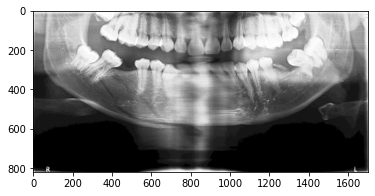

In [ ]:
plt.imshow(ilognorm_preprocessing(img))
cv2.imwrite('/gdrive/My Drive/ilog_equ.png',  ilognorm_preprocessing(img))

True

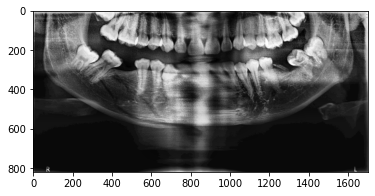

In [ ]:
plt.imshow(ilognorm_CLAHE_preprocessing(img))
cv2.imwrite('/gdrive/My Drive/ilog_clahe.png',  ilognorm_CLAHE_preprocessing(img))

True

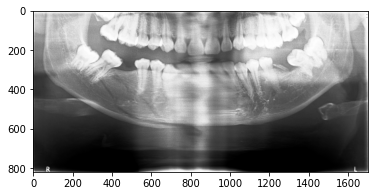

In [ ]:
plt.imshow(lognorm_preprocessing(img))
cv2.imwrite('/gdrive/My Drive/log_equ.png',  lognorm_preprocessing(img))

True

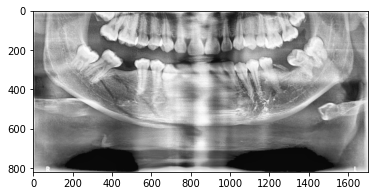

In [ ]:
plt.imshow(lognorm_CLAHE_preprocessing(img))
cv2.imwrite('/gdrive/My Drive/log_CLAHE.png',  lognorm_CLAHE_preprocessing(img))

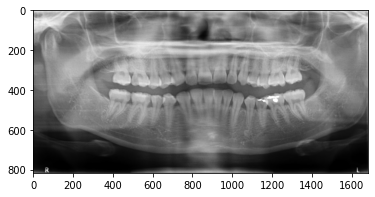

In [ ]:
hsv_image = cv2.bilateralFilter(img,5,25,25)
plt.imshow(hsv_image,cmap=plt.cm.gray)

Rt. Condyle (96.2)
Lt. Coronoid (83.2)
Symphysis-Parasymphysis (70.6)
Rt. Body (40.3)
Lt. Body (13.4)
Lt. Condyle (6.43)
Rt. Coronoid (2.21)
Lt. Ramus-Angle (2.09)
Rt. Ramus-Angle (1.64)


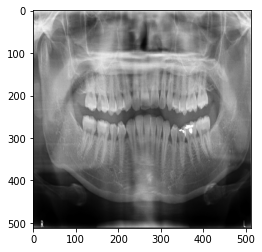

In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image
path =  '/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean'
df = pd.read_csv(os.path.join(path, 'data_clean.csv'))
img_width, img_height = 512, 512


img = image.load_img('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case16.jpg', target_size = (img_width, img_height))
#img = image.load_img('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case20.jpg', target_size = (img_width, img_height))

plt.imshow(img)

img_pred = image.img_to_array(img)
img_pred = np.expand_dims(img_pred, axis = 0)

#classes = np.array(df.columns[2:])

proba=model.predict(img_pred)
# #สำหรับพรีดิกสองคลาส
#predictions = 'no_fx' if proba[0][0]>0.5 else 'fx'
#print(predictions)
#print("{}".format(predictions)+" ({:.3})".format(proba[0][0]*100))

top_8 = np.argsort(proba[0])[:-10:-1]
top_3 = np.argsort(proba[0])[:-4:-1]
classes = np.array(df.columns[1:])
# print(classes)
for i in range(9):
    #print("{}".format(classes[top_3[i]])+" ({:.3})".format(pred[0][top_3[i]]))
   print("{}".format(classes[top_8[i]])+" ({:.3})".format(proba[0][top_8[i]]*100))
        

In [ ]:
grad_pred = 'Rt. Condyle'

if grad_pred == 'Lt. Condyle':
   CLASS_INDEX = 0
elif grad_pred =='Rt. Condyle':
   CLASS_INDEX = 1
elif grad_pred == 'Lt. Coronoid':
   CLASS_INDEX = 6
elif grad_pred == 'Rt. Coronoid':
   CLASS_INDEX = 7
elif grad_pred == 'Lt. Ramus-Angle':
  CLASS_INDEX = 2
elif grad_pred == 'Rt. Ramus-Angle':
  CLASS_INDEX = 3
elif grad_pred == 'Lt. Body':
  CLASS_INDEX = 4
elif grad_pred == 'Rt. Body':
  CLASS_INDEX = 5
elif grad_pred == 'Symphysis-Parasymphysis':
  CLASS_INDEX = 8
    

In [ ]:
#for layer in  model.layers:
 # print(layer.name, layer)

In [ ]:
import cv2
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model



#img = image.load_img('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case16.jpg', target_size = (img_width, img_height))
img = image.load_img('/gdrive/My Drive/Mandibular Fracture/dataset/dataset_clean/OPG Film Set 1/case20.jpg', target_size = (img_width, img_height))


img = tf.keras.preprocessing.image.img_to_array(img)

#model = Model(inputs=baseModel.input, outputs=headModel)

#mobilenet
#grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('out_relu').output, model.output])

#VGG
#grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('block5_conv3').output, model.output])

#Dense
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('bn').output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:,CLASS_INDEX]
    

output = conv_outputs[0]

grads =  tape.gradient(loss, conv_outputs)[0]


guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads >0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (512, 512))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.8, cam, 0.5, 0.5)
img_resize = cv2.resize(output_image, (1400,800))

In [ ]:
#im_rgb = cv2.cvtColor(img_resize , cv2.COLOR_RGB2BGR)
#cv2.imwrite('/gdrive/My Drive/Cam_Set2_1905997.png', im_rgb )

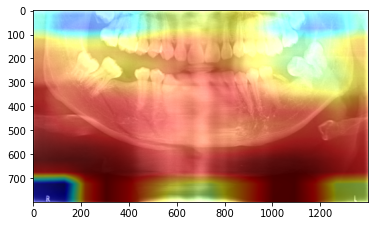

In [ ]:
plt.imshow(img_resize)

In [ ]:
model.summary()